In [61]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import random
import numpy as np
import pandas as pd
import copy
import json
import pickle
from networkFunctions import *
from plotFunctions import *
from populationGraph import populationGraph
from adversarialAgent import adversarialAgent

In [2]:
my_dict = pickle.load(open('pickle_files/vary_type.pkl', 'rb'))
my_dict

{'msgUtility': 10,
 'costFactor': 0.1,
 'numNodes': 100,
 'numMsg': 1000,
 'myseed': 67,
 'maxEpochs': 10000,
 'type': [utilitarianAgent.utilitarianAgent,
  deonticAgent.deonticAgent,
  virtuousAgent.virtuousAgent,
  transcendenceAgent.transcendenceAgent],
 'advRatio': 0,
 'outcomeNetwork': {'Utilitarian': <populationGraph.populationGraph at 0x7fab5fda0190>,
  'Deonotology': <populationGraph.populationGraph at 0x7fab653f4130>,
  'Virtue': <populationGraph.populationGraph at 0x7fab65535d60>,
  'Transcendence (0.5)': <populationGraph.populationGraph at 0x7fab65578f70>}}

In [3]:
best_util = my_dict["outcomeNetwork"]["Utilitarian"]

In [4]:
my_dict["outcomeNetwork"].keys()

dict_keys(['Utilitarian', 'Deonotology', 'Virtue', 'Transcendence (0.5)'])

In [5]:
# plotNetworkVaryParams(my_dict["outcomeNetwork"],'utility',attr="type",plotType='bar')

outcome network  {'Utilitarian': <populationGraph.populationGraph object at 0x7fab5fda0190>, 'Deonotology': <populationGraph.populationGraph object at 0x7fab653f4130>, 'Virtue': <populationGraph.populationGraph object at 0x7fab65535d60>, 'Transcendence (0.5)': <populationGraph.populationGraph object at 0x7fab65578f70>}


[1957.0, 1838.0, 1903.0, 1955.0]

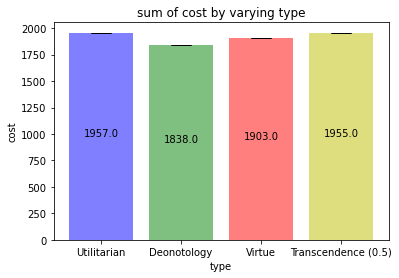

In [6]:
plotNetworkVaryParams(my_dict["outcomeNetwork"],'cost',"type",plotType='bar')

outcome network  {'Utilitarian': <populationGraph.populationGraph object at 0x7fab5fda0190>, 'Deonotology': <populationGraph.populationGraph object at 0x7fab653f4130>, 'Virtue': <populationGraph.populationGraph object at 0x7fab65535d60>, 'Transcendence (0.5)': <populationGraph.populationGraph object at 0x7fab65578f70>}


[43, 38, 39, 43]

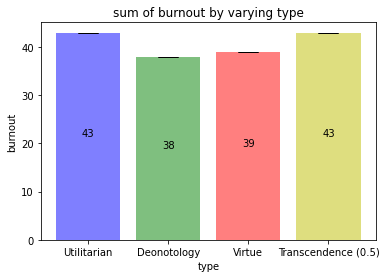

In [7]:
plotNetworkVaryParams(my_dict["outcomeNetwork"],'burnout',"type",plotType='bar')

In [8]:
deontic_dict = pickle.load(open('pickle_files/AdvRatio/Deontic.pkl', 'rb'))
deontic_dict

{'msgUtility': 10,
 'costFactor': 0.1,
 'numNodes': 100,
 'numMsg': 1000,
 'myseed': 67,
 'maxEpochs': 10000,
 'type': deonticAgent.deonticAgent,
 'advRatio': array([0. , 0.2, 0.4, 0.6, 0.8]),
 'outcomeNetwork': {0.0: <populationGraph.populationGraph at 0x7fab655c2c10>,
  0.2: <populationGraph.populationGraph at 0x7fab497f0ee0>,
  0.4: <populationGraph.populationGraph at 0x7fab4a0ba910>,
  0.6000000000000001: <populationGraph.populationGraph at 0x7fab4a203130>,
  0.8: <populationGraph.populationGraph at 0x7fab4a2448b0>}}

outcome network  {0.0: <populationGraph.populationGraph object at 0x7fab655c2c10>, 0.2: <populationGraph.populationGraph object at 0x7fab497f0ee0>, 0.4: <populationGraph.populationGraph object at 0x7fab4a0ba910>, 0.6000000000000001: <populationGraph.populationGraph object at 0x7fab4a203130>, 0.8: <populationGraph.populationGraph object at 0x7fab4a2448b0>}


[7100, 3600, 720, -1160, -5020]

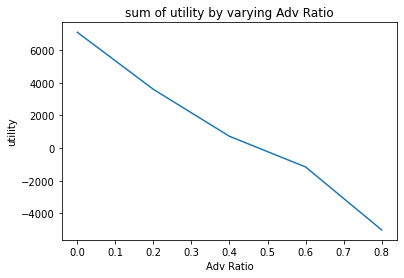

In [9]:
plotNetworkVaryParams(deontic_dict["outcomeNetwork"],'utility',"Adv Ratio")

In [10]:
util_dict = pickle.load(open('pickle_files/AdvRatio/Utilitarian.pkl', 'rb'))
util_dict

{'msgUtility': 10,
 'costFactor': 0.1,
 'numNodes': 100,
 'numMsg': 1000,
 'myseed': 67,
 'maxEpochs': 10000,
 'type': utilitarianAgent.utilitarianAgent,
 'advRatio': array([0. , 0.2, 0.4, 0.6, 0.8]),
 'outcomeNetwork': {0.0: <populationGraph.populationGraph at 0x7fab4a079580>,
  0.2: <populationGraph.populationGraph at 0x7fab4a3b0400>,
  0.4: <populationGraph.populationGraph at 0x7fab4a3f1640>,
  0.6000000000000001: <populationGraph.populationGraph at 0x7fab4a430880>,
  0.8: <populationGraph.populationGraph at 0x7fab4a471ac0>}}

In [11]:
virtue_dict = pickle.load(open('pickle_files/AdvRatio/Virtue.pkl', 'rb'))
virtue_dict

{'msgUtility': 10,
 'costFactor': 0.1,
 'numNodes': 100,
 'numMsg': 1000,
 'myseed': 67,
 'maxEpochs': 10000,
 'type': virtuousAgent.virtuousAgent,
 'advRatio': array([0. , 0.2, 0.4, 0.6, 0.8]),
 'outcomeNetwork': {0.0: <populationGraph.populationGraph at 0x7fab655d6220>,
  0.2: <populationGraph.populationGraph at 0x7fab4a70ce50>,
  0.4: <populationGraph.populationGraph at 0x7fab655d6f70>,
  0.6000000000000001: <populationGraph.populationGraph at 0x7fab6558dac0>,
  0.8: <populationGraph.populationGraph at 0x7fab6572baf0>}}

In [12]:
trans_dict = pickle.load(open('pickle_files/AdvRatio/Transcendence.pkl', 'rb'))
trans_dict

{'msgUtility': 10,
 'costFactor': 0.1,
 'numNodes': 100,
 'numMsg': 1000,
 'myseed': 67,
 'maxEpochs': 10000,
 'type': transcendenceAgent.transcendenceAgent,
 'advRatio': array([0. , 0.2, 0.4, 0.6, 0.8]),
 'outcomeNetwork': {0.0: <populationGraph.populationGraph at 0x7fab653fd310>,
  0.2: <populationGraph.populationGraph at 0x7fab497382e0>,
  0.4: <populationGraph.populationGraph at 0x7fab4748b1c0>,
  0.6000000000000001: <populationGraph.populationGraph at 0x7fab47502a90>,
  0.8: <populationGraph.populationGraph at 0x7fab47430040>}}

In [13]:
translow_dict = pickle.load(open('pickle_files/AdvRatio/Transcendence(0.1).pkl', 'rb'))
transhigh_dict = pickle.load(open('pickle_files/AdvRatio/Transcendence(1).pkl', 'rb'))
transDict = {0.1:translow_dict["outcomeNetwork"],1:transhigh_dict["outcomeNetwork"]}

In [14]:
outcomeList = {"Deontology":deontic_dict["outcomeNetwork"], "Utilittarian":util_dict["outcomeNetwork"], "Virtue":virtue_dict["outcomeNetwork"],"Transcendence":trans_dict["outcomeNetwork"]} 

In [15]:
for outcome in outcomeList:
    l = [outcomeList[outcome][val] for val in outcomeList[outcome]]
    print(l)

[<populationGraph.populationGraph object at 0x7fab655c2c10>, <populationGraph.populationGraph object at 0x7fab497f0ee0>, <populationGraph.populationGraph object at 0x7fab4a0ba910>, <populationGraph.populationGraph object at 0x7fab4a203130>, <populationGraph.populationGraph object at 0x7fab4a2448b0>]
[<populationGraph.populationGraph object at 0x7fab4a079580>, <populationGraph.populationGraph object at 0x7fab4a3b0400>, <populationGraph.populationGraph object at 0x7fab4a3f1640>, <populationGraph.populationGraph object at 0x7fab4a430880>, <populationGraph.populationGraph object at 0x7fab4a471ac0>]
[<populationGraph.populationGraph object at 0x7fab655d6220>, <populationGraph.populationGraph object at 0x7fab4a70ce50>, <populationGraph.populationGraph object at 0x7fab655d6f70>, <populationGraph.populationGraph object at 0x7fab6558dac0>, <populationGraph.populationGraph object at 0x7fab6572baf0>]
[<populationGraph.populationGraph object at 0x7fab653fd310>, <populationGraph.populationGraph obj

In [16]:
for outcome in outcomeList:
    print([outcomeList[outcome][val].getNumNodes()*(1-val) for val in outcomeList[outcome]])
    # print(outcomeList[outcome])
outcomeList.keys()

[100.0, 80.0, 60.0, 39.99999999999999, 19.999999999999996]
[100.0, 80.0, 60.0, 39.99999999999999, 19.999999999999996]
[100.0, 80.0, 60.0, 39.99999999999999, 19.999999999999996]
[100.0, 80.0, 60.0, 39.99999999999999, 19.999999999999996]


dict_keys(['Deontology', 'Utilittarian', 'Virtue', 'Transcendence'])

[9100, 6400, 1120, -1140, -5040]

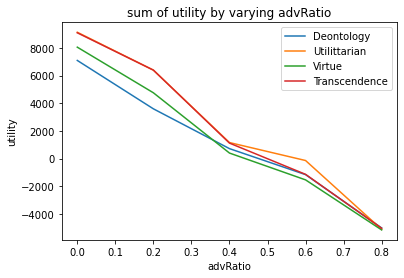

In [17]:
plotComparative(outcomeList,"utility","advRatio")

In [18]:
transDict[0.1]

{0.0: <populationGraph.populationGraph at 0x7fab653fd5e0>,
 0.2: <populationGraph.populationGraph at 0x7fab4a3564f0>,
 0.4: <populationGraph.populationGraph at 0x7fab47521e20>,
 0.6000000000000001: <populationGraph.populationGraph at 0x7fab47789640>,
 0.8: <populationGraph.populationGraph at 0x7fab477f86a0>}

In [19]:
transDict[0.1][0.2].getGraph()

In [20]:
# y_low = [np.sum(getNetworkProp(transDict[0.1][val].getGraph()/(transDict[0.1][val].getNumNodes()*(1-val)), 'burnout')) for val in transDict[0.1]]

In [21]:
[np.sum(getNetworkProp(transDict[0.1][val].getGraph(), 'utility')) for val in transDict[0.1]]

[4500, 1640, -1900, -3380, -6280]

[91.0, 80.0, 18.666666666666668, -28.500000000000004, -252.00000000000006]

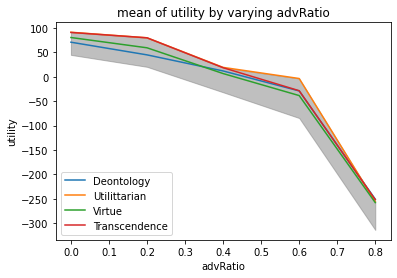

In [22]:
plotComparative_shaded(outcomeList,transDict,"utility","advRatio", metric="mean")

{0: 'Deontology', 1: 'Adversary'}
{0: 'Deontology', 1: 'Adversary'}
{0: 'Deontology', 1: 'Adversary'}
{0: 'Deontology', 1: 'Adversary'}
{0: 'Deontology', 1: 'Adversary'}
dict_keys([0.0, 0.2, 0.4, 0.6000000000000001, 0.8]) [7100, 2920, 470, -760, -1230]
[0, 680, 250, -400, -3790]
{0: 'Utilitarian', 1: 'Adversary'}
{0: 'Utilitarian', 1: 'Adversary'}
{0: 'Utilitarian', 1: 'Adversary'}
{0: 'Utilitarian', 1: 'Adversary'}
{0: 'Utilitarian', 1: 'Adversary'}
dict_keys([0.0, 0.2, 0.4, 0.6000000000000001, 0.8]) [9140, 5460, 290, 10, -1030]
[0, 940, 870, -150, -4090]
{0: 'Virtue', 1: 'Adversary'}
{0: 'Virtue', 1: 'Adversary'}
{0: 'Virtue', 1: 'Adversary'}
{0: 'Virtue', 1: 'Adversary'}
{0: 'Virtue', 1: 'Adversary'}
dict_keys([0.0, 0.2, 0.4, 0.6000000000000001, 0.8]) [8060, 3910, 310, -630, -840]
[0, 850, 90, -910, -4320]
{0: 'Transcendence', 1: 'Adversary'}
{0: 'Transcendence', 1: 'Adversary'}
{0: 'Transcendence', 1: 'Adversary'}
{0: 'Transcendence', 1: 'Adversary'}
{0: 'Transcendence', 1: 'Advers

<ipython-input-23-4be0cb530b34>:19: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  agentDict[i] = np.sum(agent.getProperty('utility') for agent in agentDict[i])


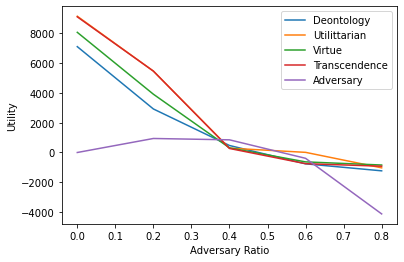

In [23]:
fig, ax = plt.subplots()
for outcome in outcomeList:
    # print(outcom  e)
    var = outcomeList[outcome]
    y_vals = []
    y_vals_adv = []
    for graph in var:
        # print(var[graph])
        types = list(var[graph].getAgentMapping().values())
        # print(types)
        G = var[graph].getGraph()
        agentDict = {}
        for i in types:
            agentDict[i] = []
        for agents in G:
            agentType = G.nodes[agents]['agent'].getType()
            agentDict[agentType].append(G.nodes[agents]['agent'])
        for i in agentDict:
            agentDict[i] = np.sum(agent.getProperty('utility') for agent in agentDict[i])
        # print(agentDict)
        y_vals.append(agentDict[types[0]])
        y_vals_adv.append(agentDict[types[1]])
    print(outcomeList[outcome].keys(), y_vals)
    print(y_vals_adv)
    ax.plot(list(outcomeList[outcome].keys()), y_vals)
    
ax.plot(list(outcomeList[outcome].keys()), y_vals_adv)
list1 = list(outcomeList.keys())
list1.append("Adversary")
ax.legend(list1)
ax.set_xlabel("Adversary Ratio")
ax.set_ylabel("Utility")
fig.savefig("adversary.png", dpi=1000)




{0: 'Transcendence', 1: 'Adversary'}
{'Transcendence': 9100, 'Adversary': 0}
type  ['Transcendence', 'Adversary']
{0: 'Transcendence', 1: 'Adversary'}
{'Transcendence': 5460, 'Adversary': 940}
type  ['Transcendence', 'Adversary']
{0: 'Transcendence', 1: 'Adversary'}
{'Transcendence': 270, 'Adversary': 850}
type  ['Transcendence', 'Adversary']
{0: 'Transcendence', 1: 'Adversary'}
{'Transcendence': -750, 'Adversary': -390}
type  ['Transcendence', 'Adversary']
{0: 'Transcendence', 1: 'Adversary'}
{'Transcendence': -920, 'Adversary': -4120}
type  ['Transcendence', 'Adversary']
dict_keys([0.0, 0.2, 0.4, 0.6000000000000001, 0.8]) [9100, 5460, 270, -750, -920]


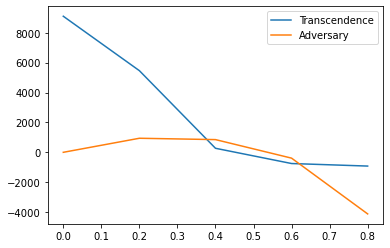

In [24]:
new_dict = {"Transcendence":trans_dict["outcomeNetwork"]}
ethics_linePlots(new_dict,'utility',"utility")

[1955.0, 1820.0, 1556.0, 1443.0, 1248.0]

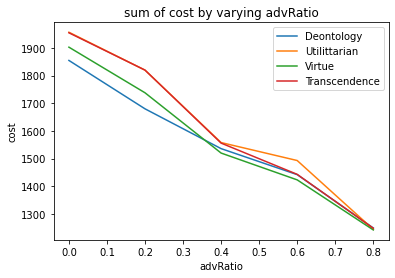

In [25]:
plotComparative(outcomeList,"cost","advRatio")

[19.55, 22.75, 25.933333333333334, 36.07500000000001, 62.40000000000001]

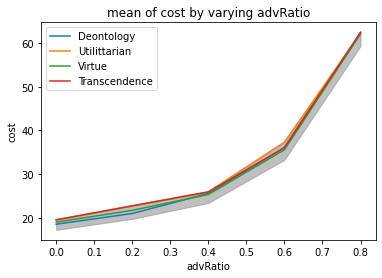

In [26]:
plotComparative_shaded(outcomeList,transDict,"cost","advRatio",metric="mean")

[43, 36, 19, 18, 7]

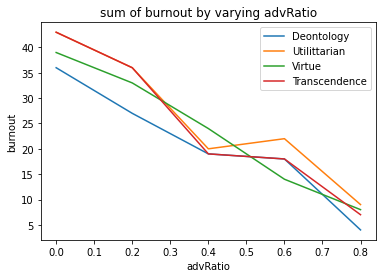

In [27]:
plotComparative(outcomeList,"burnout","advRatio")

[43, 36, 19, 18, 7]

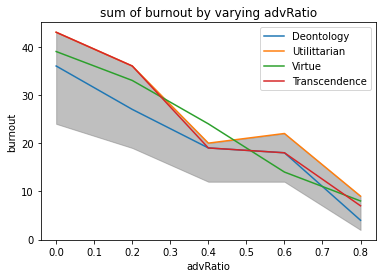

In [28]:
plotComparative_shaded(outcomeList,transDict,"burnout","advRatio")

[0.43, 0.45, 0.31666666666666665, 0.45000000000000007, 0.3500000000000001]

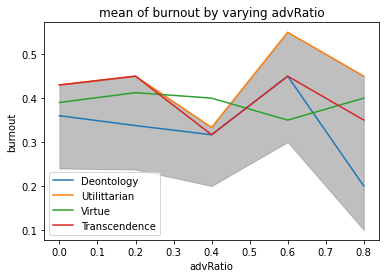

In [29]:
plotComparative_shaded(outcomeList,transDict,"burnout","advRatio",metric="mean")

In [30]:
outcomeList

{'Deontology': {0.0: <populationGraph.populationGraph at 0x7fab655c2c10>,
  0.2: <populationGraph.populationGraph at 0x7fab497f0ee0>,
  0.4: <populationGraph.populationGraph at 0x7fab4a0ba910>,
  0.6000000000000001: <populationGraph.populationGraph at 0x7fab4a203130>,
  0.8: <populationGraph.populationGraph at 0x7fab4a2448b0>},
 'Utilittarian': {0.0: <populationGraph.populationGraph at 0x7fab4a079580>,
  0.2: <populationGraph.populationGraph at 0x7fab4a3b0400>,
  0.4: <populationGraph.populationGraph at 0x7fab4a3f1640>,
  0.6000000000000001: <populationGraph.populationGraph at 0x7fab4a430880>,
  0.8: <populationGraph.populationGraph at 0x7fab4a471ac0>},
 'Virtue': {0.0: <populationGraph.populationGraph at 0x7fab655d6220>,
  0.2: <populationGraph.populationGraph at 0x7fab4a70ce50>,
  0.4: <populationGraph.populationGraph at 0x7fab655d6f70>,
  0.6000000000000001: <populationGraph.populationGraph at 0x7fab6558dac0>,
  0.8: <populationGraph.populationGraph at 0x7fab6572baf0>},
 'Transcende

0.36
0.27
0.19
0.18
0.04
0.43
0.36
0.2
0.22
0.09
0.39
0.33
0.24
0.14
0.08
0.43
0.36
0.19
0.18
0.07


[51.87, 40.96, 9.07, -9.35, -46.87]

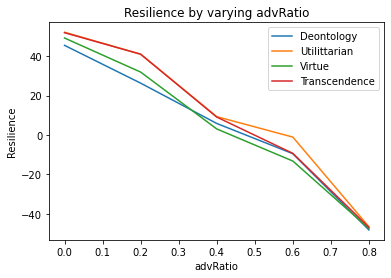

In [31]:
plotComparativeRes(outcomeList,"advRatio")

In [32]:
num_msg_dict = pickle.load(open('pickle_files/vary_type_10kmsg', 'rb'))
num_msg_dict

{'msgUtility': 10,
 'costFactor': 0.1,
 'numNodes': 100,
 'numMsg': 1000,
 'myseed': 67,
 'maxEpochs': 10000,
 'type': ['Utilitarian', 'Deonotology', 'Virtue', 'Transcendence (0.5)'],
 'advRatio': 0,
 'outcomeNetwork': {'Utilitarian': <populationGraph.populationGraph at 0x7fab480dafd0>,
  'Deonotology': <populationGraph.populationGraph at 0x7fab484a58e0>,
  'Virtue': <populationGraph.populationGraph at 0x7fab48a44070>,
  'Transcendence (0.5)': <populationGraph.populationGraph at 0x7fab4897b4c0>}}

outcome network  {'Utilitarian': <populationGraph.populationGraph object at 0x7fab480dafd0>, 'Deonotology': <populationGraph.populationGraph object at 0x7fab484a58e0>, 'Virtue': <populationGraph.populationGraph object at 0x7fab48a44070>, 'Transcendence (0.5)': <populationGraph.populationGraph object at 0x7fab4897b4c0>}


[81940, 46220, 81940, 81900]

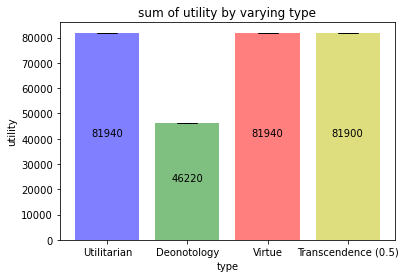

In [33]:
plotNetworkVaryParams(num_msg_dict["outcomeNetwork"],'utility',"type",plotType='bar')

In [34]:
gamma_dict = pickle.load(open('pickle_files/vary_gamma.pkl', 'rb'))
gamma_dict

best_trans = gamma_dict["outcomeNetwork"][1]

outcome network  {0.0: <populationGraph.populationGraph object at 0x7fab487218b0>, 0.1: <populationGraph.populationGraph object at 0x7fab4916efd0>, 0.2: <populationGraph.populationGraph object at 0x7fab49257610>, 0.30000000000000004: <populationGraph.populationGraph object at 0x7fab491fea90>, 0.4: <populationGraph.populationGraph object at 0x7fab48217250>, 0.5: <populationGraph.populationGraph object at 0x7fab4829c5b0>, 0.6000000000000001: <populationGraph.populationGraph object at 0x7fab485549d0>, 0.7000000000000001: <populationGraph.populationGraph object at 0x7fab490eadf0>, 0.8: <populationGraph.populationGraph object at 0x7fab4948f250>, 0.9: <populationGraph.populationGraph object at 0x7fab49633670>, 1.0: <populationGraph.populationGraph object at 0x7fab4c9cda90>}


[-59.8, 45.0, 82.2, 88.4, 90.4, 91.0, 91.2, 91.2, 91.2, 91.4, 91.4]

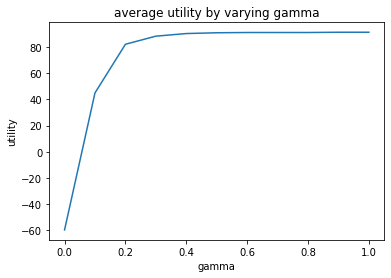

In [35]:
plotNetworkVaryParams(gamma_dict["outcomeNetwork"],'utility',"gamma",fig_label="vary/vary_gamma",metric="mean")
# plt.savefig("/results/vary_gamma.png", dpi=600)


In [36]:
fp_dict = pickle.load(open('pickle_files/vary_fp.pkl', 'rb'))
best_deontic = fp_dict["outcomeNetwork"][1]

outcome network  {0.0: <populationGraph.populationGraph object at 0x7fab48ef3820>, 0.1: <populationGraph.populationGraph object at 0x7fab48f3b070>, 0.2: <populationGraph.populationGraph object at 0x7fab49193640>, 0.30000000000000004: <populationGraph.populationGraph object at 0x7fab491c5af0>, 0.4: <populationGraph.populationGraph object at 0x7fab49266eb0>, 0.5: <populationGraph.populationGraph object at 0x7fab4929a310>, 0.6000000000000001: <populationGraph.populationGraph object at 0x7fab492cc7f0>, 0.7000000000000001: <populationGraph.populationGraph object at 0x7fab4898f430>, 0.8: <populationGraph.populationGraph object at 0x7fab477c9400>, 0.9: <populationGraph.populationGraph object at 0x7fab4804e550>, 1.0: <populationGraph.populationGraph object at 0x7fab48736670>}


[-100.0, -76.6, -60.2, -42.4, -21.8, -3.6, 17.6, 36.8, 56.6, 75.2, 91.0]

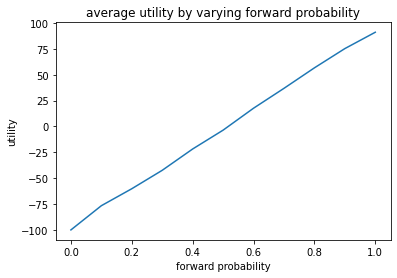

In [37]:
plotNetworkVaryParams(fp_dict["outcomeNetwork"],'utility',"forward probability",fig_label="vary/vary_fp",metric="mean")

In [38]:
bin_dict = pickle.load(open('pickle_files/vary_bin.pkl', 'rb'))
bin_dict
best_virtue = bin_dict["outcomeNetwork"][90]

outcome network  {0.0: <populationGraph.populationGraph object at 0x7fab47545d90>, 10.0: <populationGraph.populationGraph object at 0x7fab4941b970>, 20.0: <populationGraph.populationGraph object at 0x7fab4876e3d0>, 30.0: <populationGraph.populationGraph object at 0x7fab48573c70>, 40.0: <populationGraph.populationGraph object at 0x7fab4864b670>, 50.0: <populationGraph.populationGraph object at 0x7fab490f0f40>, 60.0: <populationGraph.populationGraph object at 0x7fab48920970>, 70.0: <populationGraph.populationGraph object at 0x7fab494513a0>, 80.0: <populationGraph.populationGraph object at 0x7fab494abc40>, 90.0: <populationGraph.populationGraph object at 0x7fab494dc640>}


[6.2, 52.6, 80.6, 86.4, 86.8, 86.8, 86.8, 86.8, 86.8, 86.8]

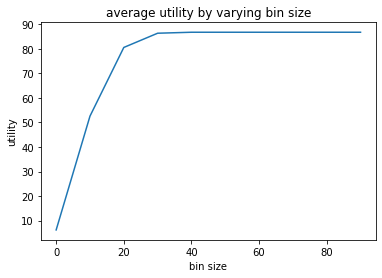

In [39]:
plotNetworkVaryParams(bin_dict["outcomeNetwork"],'utility',"bin size",fig_label="vary/vary_bin",metric="mean")

outcome network  {0.0: <populationGraph.populationGraph object at 0x7fab47545d90>, 10.0: <populationGraph.populationGraph object at 0x7fab4941b970>, 20.0: <populationGraph.populationGraph object at 0x7fab4876e3d0>, 30.0: <populationGraph.populationGraph object at 0x7fab48573c70>, 40.0: <populationGraph.populationGraph object at 0x7fab4864b670>, 50.0: <populationGraph.populationGraph object at 0x7fab490f0f40>, 60.0: <populationGraph.populationGraph object at 0x7fab48920970>, 70.0: <populationGraph.populationGraph object at 0x7fab494513a0>, 80.0: <populationGraph.populationGraph object at 0x7fab494abc40>, 90.0: <populationGraph.populationGraph object at 0x7fab494dc640>}


[11, 27, 39, 40, 40, 40, 40, 40, 40, 40]

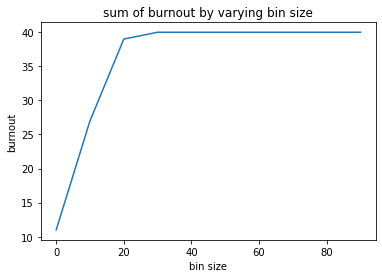

In [40]:
plotNetworkVaryParams(bin_dict["outcomeNetwork"],'burnout',"bin size")

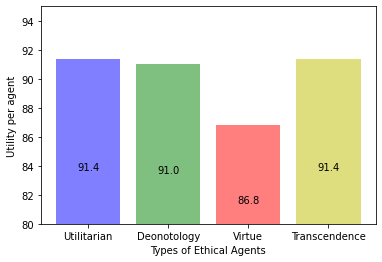

In [41]:
y = [best_util,best_deontic,best_virtue,best_trans] 

y_vals = [np.mean(getNetworkProp(agent.getGraph(), 'utility')) for agent in y]
y_std = [np.std(getNetworkProp(agent.getGraph(), 'utility')) for agent in y]
y_stderror = [value/len(y_std) for value in y_std]

x = ["Utilitarian","Deonotology", "Virtue", "Transcendence"]
plt.bar(x,y_vals, color=['b','g','r','y'], align='center', alpha=0.5, ecolor='black', capsize=10)
plt.ylim(80,95)
# plt.text(list(range(len(x))),np.zeros(len(y)),["sample" for _ in range(len(y))])#,[str(val) for val in y])
for i in range(len(x)):
    plt.text(i,y_vals[i]/2+38,y_vals[i],ha = 'center')
plt.xlabel("Types of Ethical Agents")
plt.ylabel("Utility per agent")
plt.savefig("results/best_bar/utility.png", dpi=600)
# plt.title("Parameters are set so that all ethical agents are best\n w.r.t their ethics")

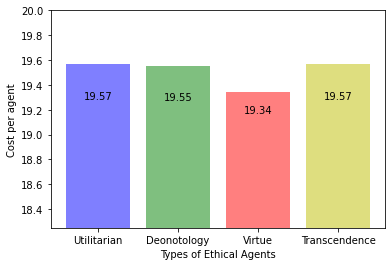

In [42]:
y = [best_util,best_deontic,best_virtue,best_trans] 

y_vals = [np.mean(getNetworkProp(agent.getGraph(), 'cost')) for agent in y]
y_std = [np.std(getNetworkProp(agent.getGraph(), 'cost')) for agent in y]
y_stderror = [value/len(y_std) for value in y_std]

x = ["Utilitarian","Deonotology", "Virtue", "Transcendence"]
plt.bar(x,y_vals, color=['b','g','r','y'], align='center', alpha=0.5, ecolor='black', capsize=10)
plt.ylim(18.25,20)
# plt.text(list(range(len(x))),np.zeros(len(y)),["sample" for _ in range(len(y))])#,[str(val) for val in y])
for i in range(len(x)):
    plt.text(i,y_vals[i]/2+9.5,y_vals[i],ha = 'center')
plt.xlabel("Types of Ethical Agents")
plt.ylabel("Cost per agent")
plt.savefig("results/best_bar/cost.png", dpi=600)
# plt.title("Parameters are set so that all ethical agents are best\n w.r.t their ethics")

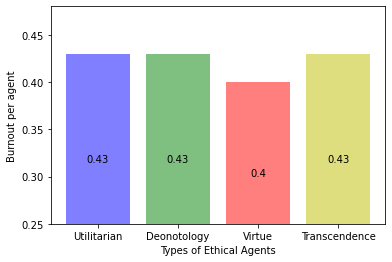

In [43]:
y = [best_util,best_deontic,best_virtue,best_trans] 

y_vals = [np.mean(getNetworkProp(agent.getGraph(), 'burnout')) for agent in y]
y_std = [np.std(getNetworkProp(agent.getGraph(), 'burnout')) for agent in y]
y_stderror = [value/len(y_std) for value in y_std]

x = ["Utilitarian","Deonotology", "Virtue", "Transcendence"]
plt.bar(x,y_vals, color=['b','g','r','y'], align='center', alpha=0.5, ecolor='black', capsize=10)
plt.ylim(0.25,0.48)
# plt.text(list(range(len(x))),np.zeros(len(y)),["sample" for _ in range(len(y))])#,[str(val) for val in y])
for i in range(len(x)):
    plt.text(i,y_vals[i]/2+0.1,y_vals[i],ha = 'center')
plt.xlabel("Types of Ethical Agents")
plt.ylabel("Burnout per agent")
plt.savefig("results/best_bar/burnout.png", dpi=600)
# plt.title("Parameters are set so that all ethical agents are best\n w.r.t their ethics")
    

In [62]:
burnout_deontic = pickle.load(open('pickle_files/burnoutThreshold/deontic.pkl', 'rb'))
burnout_util = pickle.load(open('pickle_files/burnoutThreshold/util.pkl', 'rb'))
burnout_virtue = pickle.load(open('pickle_files/burnoutThreshold/virtue.pkl', 'rb'))
burnout_trans = pickle.load(open('pickle_files/burnoutThreshold/trans(0.5).pkl', 'rb'))
burnout_trans_low = pickle.load(open('pickle_files/burnoutThreshold/trans(0.1).pkl', 'rb'))
burnout_trans_high = pickle.load(open('pickle_files/burnoutThreshold/trans(1).pkl', 'rb'))

In [63]:
burnout_trans


{'msgUtility': 10,
 'costFactor': 0.1,
 'numNodes': 100,
 'numMsg': 1000,
 'myseed': 67,
 'maxEpochs': 10000,
 'type': transcendenceAgent.transcendenceAgent,
 'advRatio': 0,
 'burnoutThreshold': array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 'outcomeNetwork': {0.0: <populationGraph.populationGraph at 0x7fab48efd070>,
  10.0: <populationGraph.populationGraph at 0x7fab4af695e0>,
  20.0: <populationGraph.populationGraph at 0x7fab543b5310>,
  30.0: <populationGraph.populationGraph at 0x7fab549b5af0>,
  40.0: <populationGraph.populationGraph at 0x7fab4e4a40a0>,
  50.0: <populationGraph.populationGraph at 0x7fab4af2f9a0>,
  60.0: <populationGraph.populationGraph at 0x7fab4d72b2e0>,
  70.0: <populationGraph.populationGraph at 0x7fab4e7fdbe0>,
  80.0: <populationGraph.populationGraph at 0x7fab4a7c9520>,
  90.0: <populationGraph.populationGraph at 0x7fab4ad7be20>}}

In [64]:
burnout_dict = {"Deontology":burnout_deontic["outcomeNetwork"],
"Utilitarian":burnout_util["outcomeNetwork"],
  "Virtue":burnout_virtue["outcomeNetwork"],
  "Transcendence":burnout_trans["outcomeNetwork"]}
burnout_trans_dict = {0.1:burnout_trans_low["outcomeNetwork"],1:burnout_trans_high["outcomeNetwork"]}

In [65]:
y_low = [np.sum(getNetworkProp(burnout_trans_dict[0.1][val].getGraph(), 'utility')) for val in burnout_trans_dict[0.1]]

[-5.0,
 -8.2,
 -4.7894736842105265,
 -3.4275862068965517,
 -2.5538461538461537,
 -2.0326530612244897,
 -1.688135593220339,
 -1.4434782608695653,
 -1.2607594936708861,
 -1.1191011235955055]

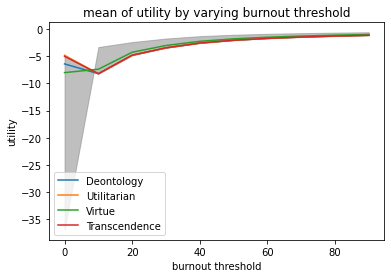

In [66]:
plotComparative_shaded(burnout_dict,burnout_trans_dict,"utility","burnout threshold",fig_label="burnout_thresh/utility",metric="mean")

[1475.0,
 1869.0,
 1955.0,
 1997.0,
 1998.0,
 1998.0,
 1998.0,
 1998.0,
 1998.0,
 1998.0]

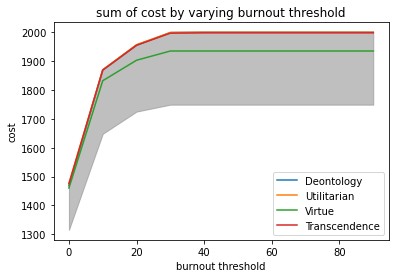

In [49]:
plotComparative_shaded(burnout_dict,burnout_trans_dict,"cost","burnout threshold")

[524, 130, 43, 1, 0, 0, 0, 0, 0, 0]

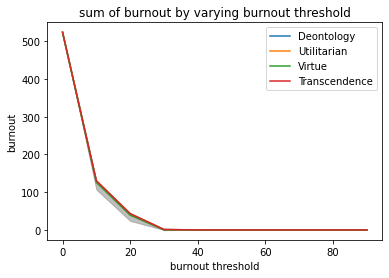

In [50]:
plotComparative_shaded(burnout_dict,burnout_trans_dict,"burnout","burnout threshold")